# A/B Testing: Understanding Through Simulations

## May 9, 2017
## Hiro Miyake

In this Jupyter notebook, I will go through analyzing some simulated data on A/B testing. A/B testing is one of the ways statistics is used to improve a business on the web.

**Contents**
1. Introduction
2. 'A' in A/B Testing
3. 'B' in A/B Testing
4. Is B Better than A?

**Appendix**

A1. Is the difference really distributed as a t distribution?

## 1. Introduction
Understanding what [A/B testing](https://en.wikipedia.org/wiki/A/B_testing) is is best illustrated with an example. A website wants to make visitors click a button on their website. One way to do that could be to try different colors of the button and see which one works best. The simplest approach could be to show a blue or red button randomly to visitors, and then see which color led to more clicks. This is the essence of A/B testing.

## 2. 'A' in A/B Testing
First let's start by understanding what the 'A' is in A/B testing. So in our example, let's say A is the red button. We are doing our test over a period of 1 week, and we get a total of $N = 10000$ visitors to our website, and we serve half of them the red button, so $N_A = N/2 = 5000$. Note that this is only a small sample of the total number of people who could access our website, which in theory could go up to the entire population on the earth, which is a little over 7 billion as of 2015. Since this is a hypothetical situation, let's assume that if we were able to show everybody on earth our website, then a fraction $p_A = 0.2$ of them will click on our button. Note that there is no uncertainty about this number, since we asked everybody we could possibly ask. But the actual number of visitors $N$ is just a small sample of the total population. So what we can do is estimate this theoretical fraction $p_A$ from our sample, and this can have an error, because the value measured may depend on who exactly visited our website, and if there were an alternate universe, a different set of people may have visited our website.

### I. Average of A
Now let's try to run a simulation to see, if we sample $N_A = 5000$ people and the underlying fraction that click is $p_A=0.2$, how many will actually click. This can be modeled as a Bernoulli process.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import t
from __future__ import division

np.random.seed(0)

na = 30
pa = 0.2

sa = np.random.binomial(1, pa, na)
a_sum = np.sum(sa)
a_avg = np.mean(sa)

print 'Total number clicked for red button:: {0}'.format(a_sum)
print 'Average number clicked for red button:: {0}'.format(a_avg)

Total number clicked for red button:: 7
Average number clicked for red button:: 0.233333333333


### II. Variance and Standard Error of A
So we get 1972 people out of 10000 who clicked on the button. From a Bernoulli distribution, we know that the variance for the mean is given by $\sigma_A^2 = p_A(1-p_A)/N_A$, and the variance for the sum is given by $\sigma_A^2 = N_A p_A(1-p_A)$. To estimate the variance from our measurements we can use our estimated value $\hat{p}_A$.

In [2]:
a_sum_var = na*a_avg*(1 - a_avg)
a_avg_var = a_avg*(1 - a_avg)/na

print 'Standard error for the total number clicked for red button:: {0}'.format(np.sqrt(a_sum_var))
print 'Standard error for the average number clicked for red button:: {0}'.format(np.sqrt(a_avg_var))

Standard error for the total number clicked for red button:: 2.31660671385
Standard error for the average number clicked for red button:: 0.0772202237951


## 3. 'B' in A/B Testing

Now that we understand how we can go about characterizing the properties of A, let's quickly get some numbers for B, standing for the blue button. For our simulation, let's assume that the underlying population fraction $p_B = 0.21$ and $N_B = 5000$.

In [3]:
np.random.seed(0)

nb = 30
pb = 0.205

sb = np.random.binomial(1, pb, nb)
b_sum = np.sum(sb)
b_avg = np.mean(sb)

print 'Total number clicked for red button:: {0}'.format(b_sum)
print 'Average number clicked for red button:: {0}'.format(b_avg)

b_sum_var = nb*b_avg*(1 - b_avg)
b_avg_var = b_avg*(1 - b_avg)/nb

print 'Standard error for the total number clicked for red button:: {0}'.format(np.sqrt(b_sum_var))
print 'Standard error for the average number clicked for red button:: {0}'.format(np.sqrt(b_avg_var))

print 'The difference between p_B and p_A is: {0}'.format(b_avg - a_avg)

Total number clicked for red button:: 8
Average number clicked for red button:: 0.266666666667
Standard error for the total number clicked for red button:: 2.42212028328
Standard error for the average number clicked for red button:: 0.0807373427759
The difference between p_B and p_A is: 0.0333333333333


## 4. Is B Better than A?
Now that we understand the outcome of A and B separately, we want to know how significant the difference is. Specifically, is the difference of $p_B - p_A = 0.0108$ due to chance, or is it 'real?' In this hypothetical case, we set $p_A = 0.2$ and $p_B = 0.21$, so obviously we know that there should be a real difference. But in the real world, we do not know what the true underlying difference is. This must be estimated from the measured values.

Then, from statistics, assuming the events A and B are uncorrelated, we know that the variance of the value $p_B - p_A$ is $\sigma^2_{\Delta}=\sigma^2_A + \sigma^2_B$.

In [4]:
pdiff = b_avg - a_avg
pdiff_var = a_avg_var + b_avg_var

print 'p_B - p_A = {0}'.format(pdiff)
print 'The standard error for the difference is: {0}'.format(np.sqrt(pdiff_var))
print '95% Confidence interval is: [{0}, {1}]'.format(pdiff - 2*np.sqrt(pdiff_var), pdiff + 2*np.sqrt(pdiff_var))

p_B - p_A = 0.0333333333333
The standard error for the difference is: 0.111720550847
95% Confidence interval is: [-0.19010776836, 0.256774435027]


What this means is that if you take a random sample of 5000 people for A and 5000 people for B, then about 95% of the time you take those samples, the difference will be $0.0108 \pm 0.0081$, where the confidence interval is $[-0.0053,  0.0269]$. Note that in reality, we have only taken one such sample.

Now you can ask, how likely is it that the effect of A and B are actually the same? That is our null hypothesis. If we assume the null hypothesis, then we should have $p_B - p_A = 0$. Then our t statistic is given by $(p_B - p_A)/\sigma_{\Delta}$.

In [5]:
tstat = pdiff/pdiff_var
print 'The t statistic is: {0}'.format(tstat)
print 'The p value is: {0}'.format(1 - t.cdf(tstat, na + nb - 1))

The t statistic is: 2.6706231454
The p value is: 0.00488397465027


The two-sided t test says that the p value is 0.5%, which means we can reject the null hypothesis with high confidence. This means we can say with high confidence that B has a bigger effect than A.

## How many samples do we need?

With widespread adoption of computers and smart phones, for many questions related to the web it's possible to gather an abundance of data to answer them quite confidently. However, there are still situations where gathering data is not that cheap, especially when physical goods are involved. For example, for economic reasons, you may want to decide if a certain product is worth keeping in inventory with the minimum amount there in the first place.

In this kind of scenario, one can imagine having item A (say it's a red shirt) and item B (a blue shirt), which are identical to each other aside from the color. And let's say you provide a service where you send a box of items to customers, and the customers can decide which items to keep and which to send back. One can then ask how many of each item should be sent to people so you have, say, 5% confidence that one item leads to more sales per item sent?

Let's assume in this case that you send the same number of item A and B so that $N_A = N_B$.

In [56]:
n = 3
pa, pb = 0.2, 0.3
pval = 1
pval_c = 0.05

np.random.seed(0)
while pval > pval_c:
    #sa = np.random.binomial(1, pa, n)
    #a_avg = np.mean(sa)
    a_avg = pa
    a_avg_var = a_avg*(1 - a_avg)/n

    #sb = np.random.binomial(1, pb, n)
    #b_avg = np.mean(sb)
    b_avg = pb
    b_avg_var = b_avg*(1 - b_avg)/n

    pdiff = b_avg - a_avg
    pdiff_var = a_avg_var + b_avg_var

    tstat = pdiff/np.sqrt(pdiff_var)
    if tstat > 0:
        pval = 2*(1 - t.cdf(tstat, 2*n - 1))
    else:
        pval = 2*t.cdf(tstat, 2*n - 1)
    n += 1

print 'The p value is: {0}'.format(pval)
print 'The small sample size to reject the null at 5% is: {0}'.format(n - 1)

The p value is: 0.0494792636289
The small sample size to reject the null at 5% is: 144


The above simulation shows that with $p_A = 0.2$ and $p_B = 0.3$, we need 144 samples each to be able to reject the null hypothesis at the level of 5%.

## Appendix

## A1. Is the difference really distributed as a t distribution?
Here we run a simulation to test that, if two samples of sample size $N_A$ and $N_B$ have the same mean, then the t statistic obtained from those samples follows a t distribution.

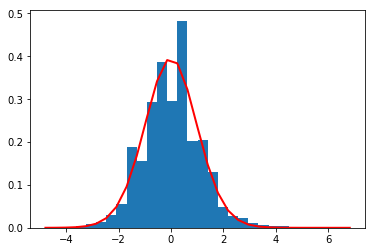

In [6]:
np.random.seed(0)

na, pa = 10, 0.4
nb, pb = 20, 0.4
sample_t = []

for i in xrange(10000):
    sa = np.random.binomial(1, pa, na)
    a_avg = np.mean(sa)
    a_avg_var = a_avg*(1 - a_avg)/na
    
    sb = np.random.binomial(1, pb, nb)
    b_avg = np.mean(sb)
    b_avg_var = b_avg*(1 - b_avg)/nb
    
    mean_diff = b_avg - a_avg
    var_diff = a_avg_var + b_avg_var
    
    sample_t.append((mean_diff - (pb - pa))/np.sqrt(var_diff))

count, bins, ignored = plt.hist(sample_t, 30, normed=True)
plt.plot(bins, t.pdf(bins, na + nb - 1), linewidth=2, color='r')
plt.show()